In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
clinical_data = pd.read_csv('C:/Users/77085/Desktop/Clinical_Data.train.csv')
genotype_data = pd.read_csv('C:/Users/77085/Desktop/Genotype.train.csv')

In [3]:
# Display the first few rows of the clinical data
print(clinical_data.head())

# Get basic information about the clinical data
print(clinical_data.info())

# Display the first few rows of the genotype data
print(genotype_data.head())

# Get basic information about the genotype data
print(genotype_data.info())

   PatientId  Gender  Height  Weight Diag  AgeAtDiag  SmokeAtDiag   Leu  \
0          1       2   165.0    59.0   CD       16.0            0   5.5   
1          3       2     NaN     NaN   UC       31.0            0   7.6   
2          4       1   174.0    67.0   CD       31.0            0   NaN   
3          5       2   172.0    60.0   UC       56.0            1  13.6   
4          6       1   182.0    74.0   CD       22.0            1   5.7   

      Hb CRP   ESR  Fer  B12  Fol   Alk   Alb  
0  120.0  20   NaN  NaN  NaN  NaN  61.0   NaN  
1  134.0   5   8.0   53  NaN  NaN  43.0   NaN  
2  103.0  40   NaN  226  299  7.9  69.0  35.0  
3  104.0  23  26.0  NaN  NaN  NaN  87.0  32.0  
4  150.0   2   NaN  NaN  NaN  NaN   NaN  44.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PatientId    1990 non-null   int64  
 1   Gender       1990 non-n

In [4]:
# List of numerical columns
num_cols = ['Height', 'Weight', 'AgeAtDiag', 'Leu', 'Hb', 'CRP', 'ESR', 'Fer', 'B12', 'Fol', 'Alk', 'Alb']
for col in num_cols:
    clinical_data[col] = clinical_data[col].replace(to_replace=r'^<', value='', regex=True)
    clinical_data[col] = clinical_data[col].replace(to_replace=r'^>', value='', regex=True)


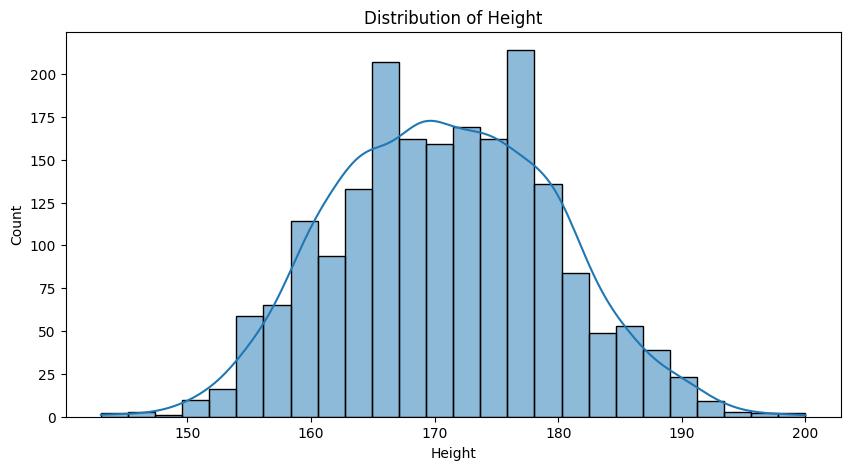

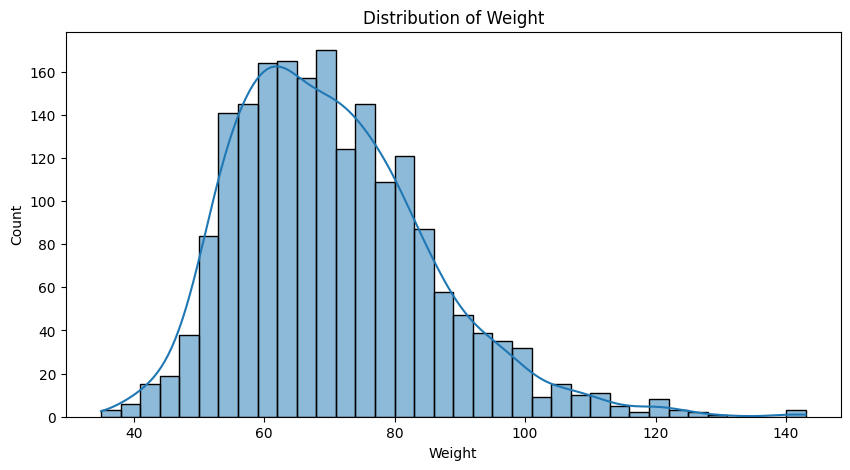

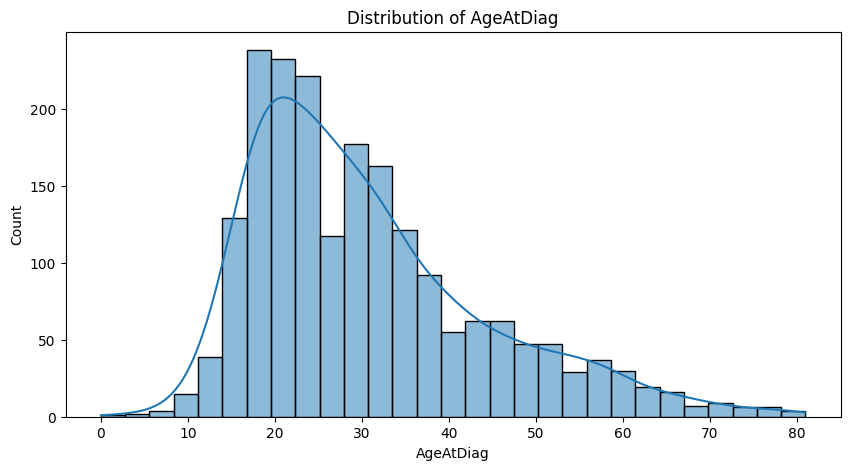

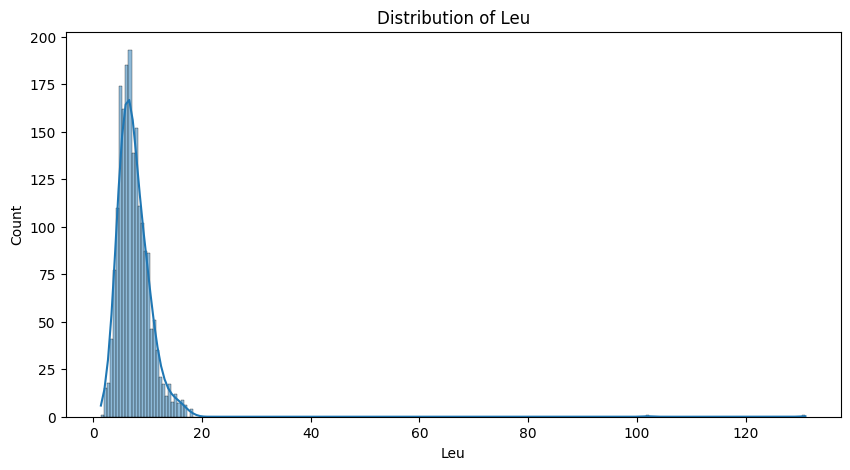

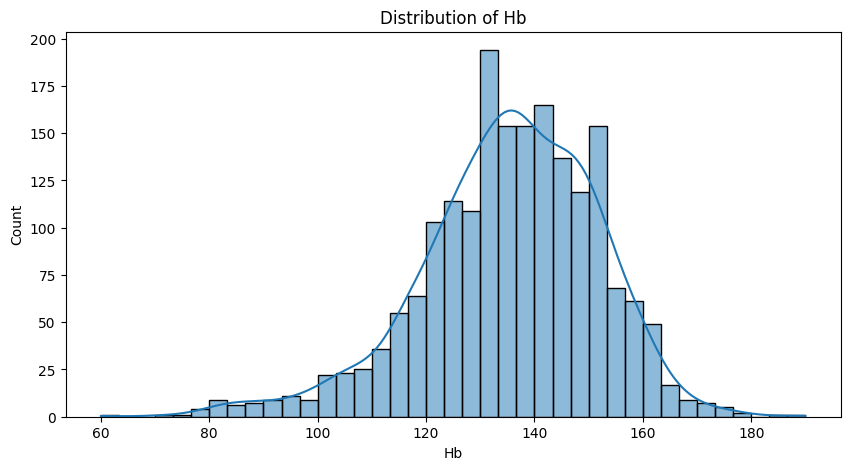

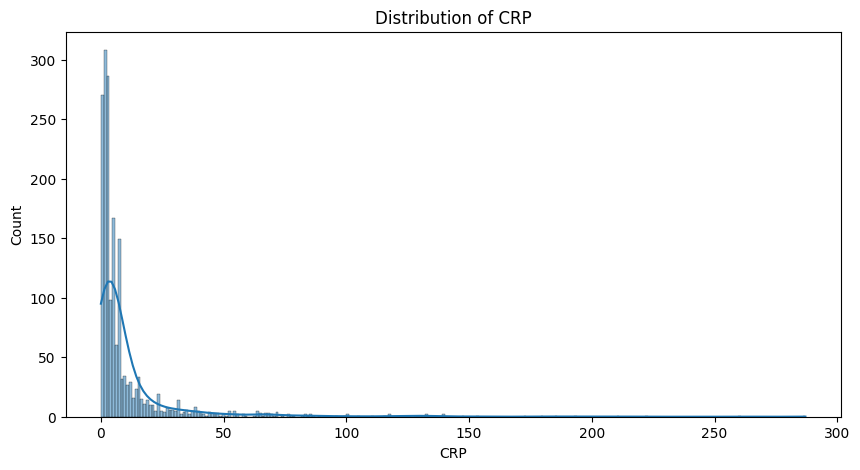

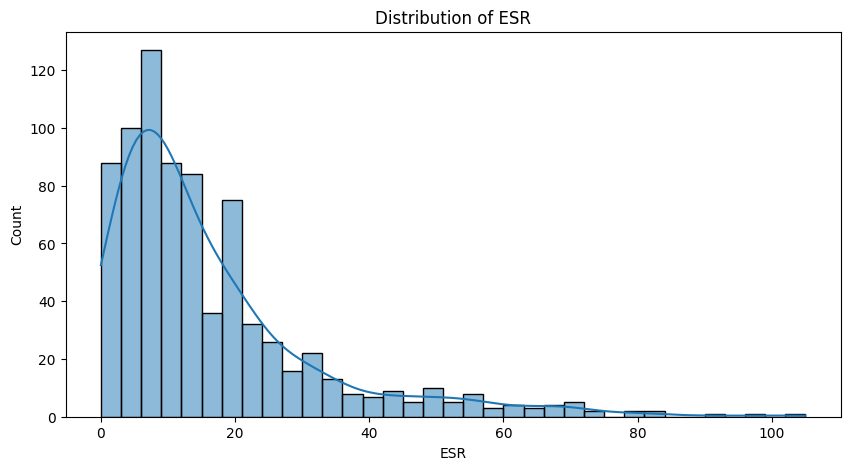

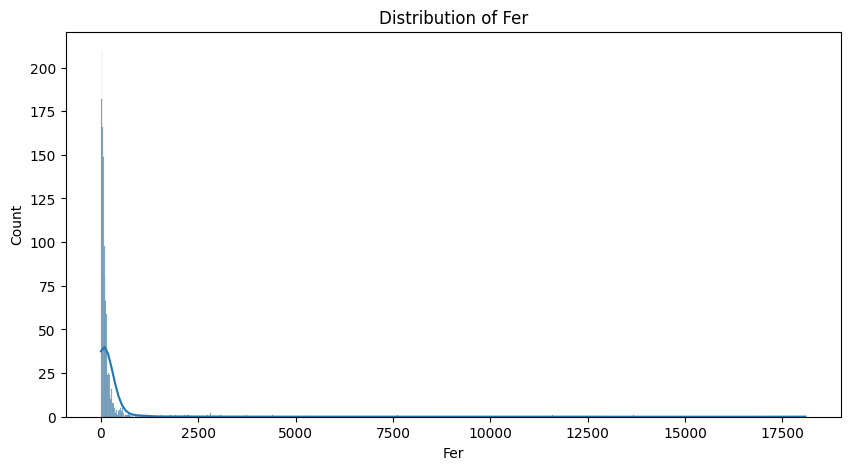

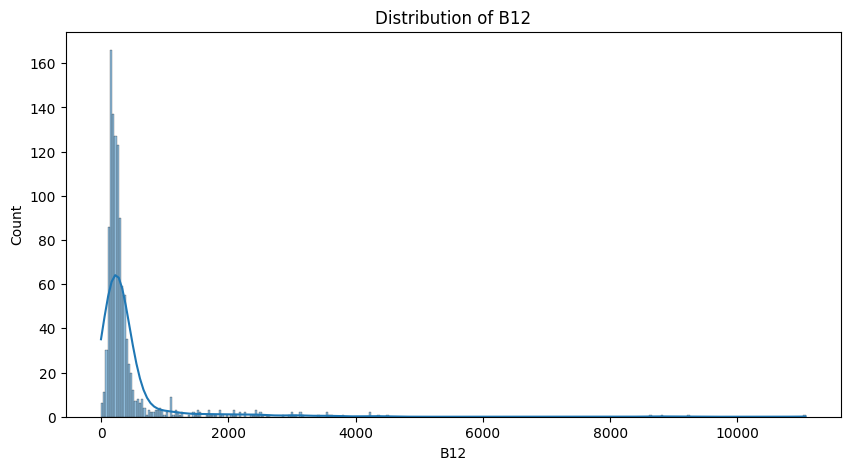

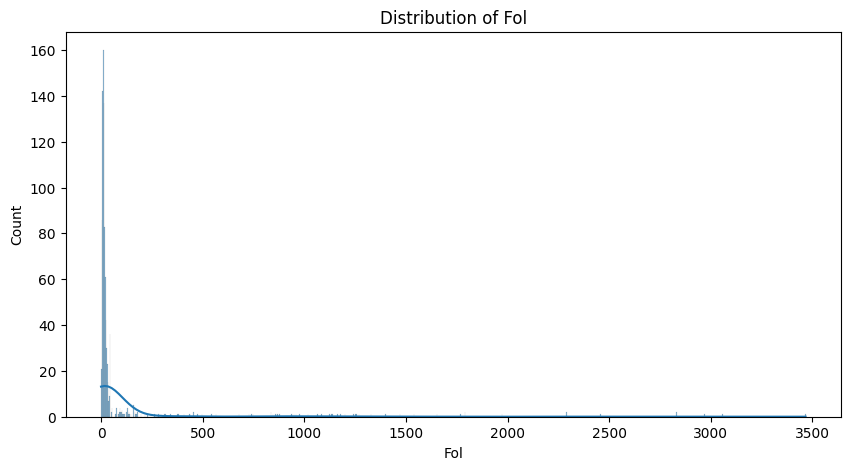

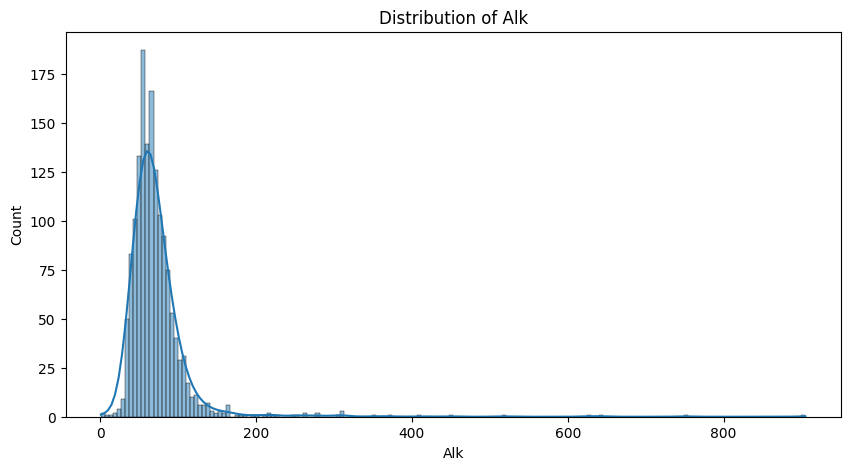

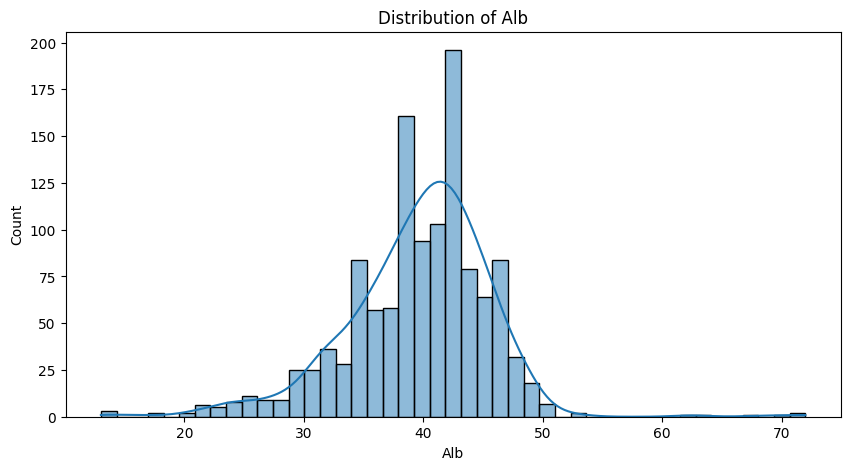

In [5]:
# Convert numerical columns to float
clinical_data[num_cols] = clinical_data[num_cols].astype(float)
# Plot histograms for each numerical column
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(clinical_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

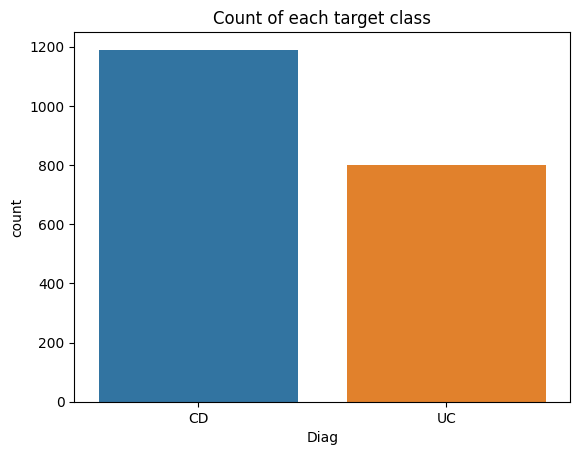

In [6]:
# Plot the count of each target class
sns.countplot(x='Diag', data=clinical_data)
plt.title('Count of each target class')
plt.show()
# Compute the correlation matrix
corr = clinical_data[num_cols].corr()

<Axes: >

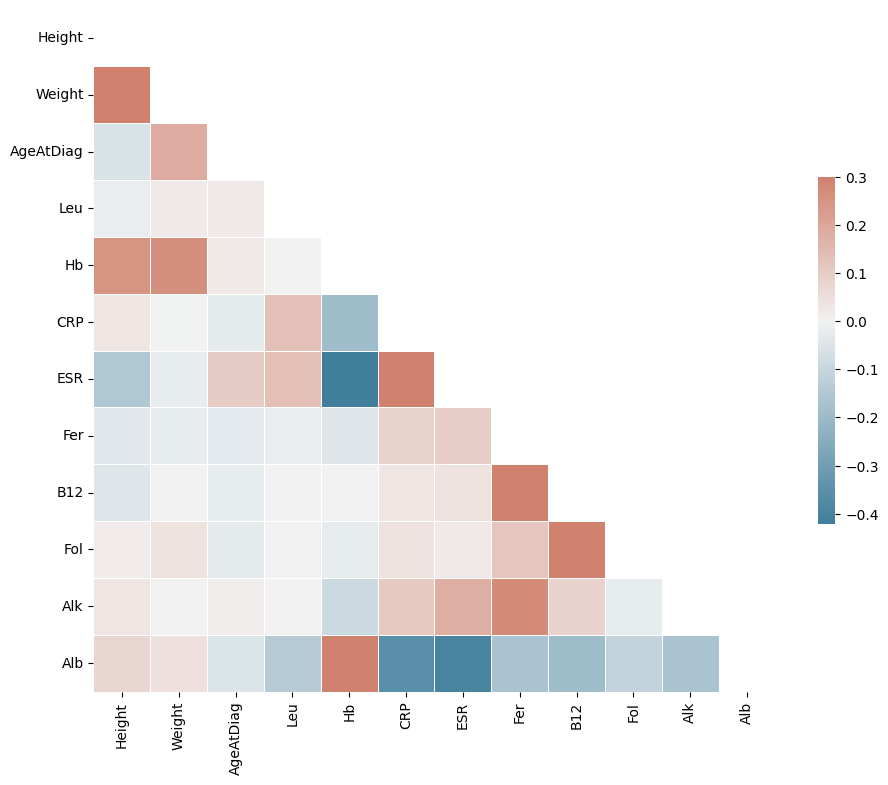

In [7]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})